# Linear Regression with Packages, Algebra, and Gradient Descent
## Hiro Miyake
## August 27, 2017
### Contents
1. [Introduction](#intro)
2. [Exploratory Data Analysis](#eda)
3. [Linear Regression with Packages](#packages)
4. [Linear Regression with Algebra](#algebra)
5. [Linear Regression with Gradient Descent](#gd)

<a id="intro"></a>
# Introduction
In this notebook, I explore linear regression. The equations are best rendering by viewing this notebook at [nbviewer](https://nbviewer.jupyter.org/github/hiromiyake/DataAnalysisProjects/blob/master/Learning/linearRegression.ipynb).

For the purposes of this notebook, I use a data set I used in another project. First, I will do a quick exploratory data analysis using the seaborn package. Then I will perform linear regression using packages made by other people and are fairly standard in the field. Next I perform linear regression analytically by minimizing the mean squared error. Then I will do the same thing using gradient descent, which is a numerical technique.

First, I load in the necessary packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import numpy as np
import pandas as pd
import seaborn as sns

## http://www.statsmodels.org/stable/index.html
import statsmodels.api as sm
import statsmodels.formula.api as smf

## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
## http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
from sklearn import linear_model

## Loading a csv file into pandas
## https://chrisalbon.com/python/pandas_dataframe_importing_csv.html

## Visualization with pandas
## https://pandas.pydata.org/pandas-docs/stable/visualization.html
## https://pandas.pydata.org/pandas-docs/stable/visualization.html

## Visualization with Seaborn
## https://seaborn.pydata.org
## http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
## https://chrisalbon.com/python/pandas_with_seaborn.html
## https://elitedatascience.com/python-seaborn-tutorial
## http://seaborn.pydata.org/tutorial.html

<a id="eda"></a>
# Exploratory Data Analysis
We can use the seaborn package to visually explore dependencies in the data.

In [2]:
df1=pd.read_csv("data/BBrMOT_Data.csv")
df1.head()

,Unnamed: 0,FileNames,Timestamp,absnum,ClearMax,amplitude,RealTime,Date,Cycle Time (s)
0,NaN,I:\Data\2017\August\04\Flea3_20S4M_04Aug2017_0...,3584715908,7217046,109,1.07480,2:25 PM,8/4/2017,6.60667
1,NaN,I:\Data\2017\August\04\Flea3_20S4M_04Aug2017_0...,3584715917,7322420,111,1.10857,NaN,NaN,NaN
2,NaN,I:\Data\2017\August\04\Flea3_20S4M_04Aug2017_0...,3584715925,7232910,111,1.07502,NaN,NaN,NaN
3,NaN,I:\Data\2017\August\04\Flea3_20S4M_04Aug2017_0...,3584715933,7165946,113,1.05917,NaN,NaN,NaN
4,NaN,I:\Data\2017\August\04\Flea3_20S4M_04Aug2017_0...,3584715942,7094478,115,1.07765,NaN,NaN,NaN


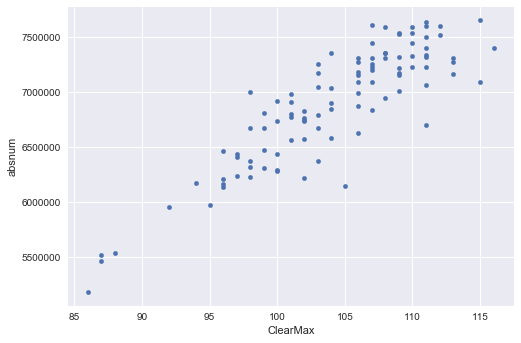

In [3]:
df1.plot.scatter(x='ClearMax', y='absnum')

It looks like there is a linear relationship between `absnum` and `ClearMax`. Seaborn allows us to plot a visually pleasing linear regression curve through these data points.

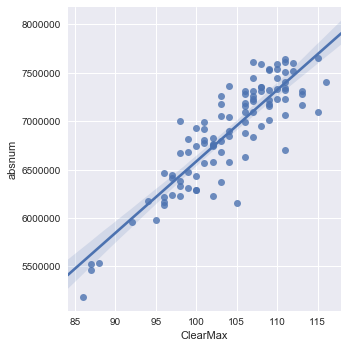

In [4]:
## https://elitedatascience.com/python-seaborn-tutorial
## https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x='ClearMax', y='absnum', data=df1)

We can also plot the residual.

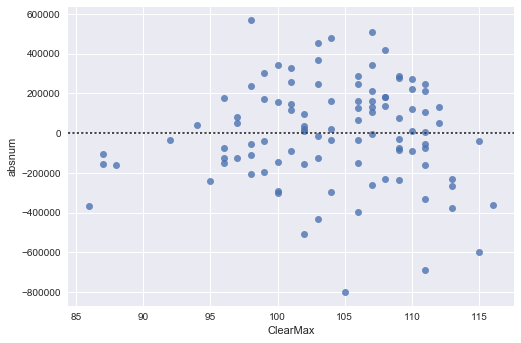

In [5]:
sns.residplot(x='ClearMax', y='absnum', data=df1)

Unfortunately, seaborn does not allow us to easily extract the linear regression parameters easily. We can use other packages for this purpose.

<a id="packages"></a>
# 3. Linear Regression with Packages
Here I will use the statsmodels and scikit-learn packages to perform linear regression on this data.

## 3.1. Linear Regression with Statsmodels

In [6]:
lm1 = smf.ols('absnum ~ ClearMax', data=df1).fit()
print lm1.summary()

                            OLS Regression Results                            
Dep. Variable:                 absnum   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     336.0
Date:                Sun, 27 Aug 2017   Prob (F-statistic):           1.36e-33
Time:                        15:35:08   Log-Likelihood:                -1400.3
No. Observations:                 101   AIC:                             2805.
Df Residuals:                      99   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -7.979e+05    4.2e+05     -1.900      0.0

## 3.2. Linear Regression with Scikit-Learn
We can do a similar thing with the scikit-learn package.

In [7]:
lm1_sk = linear_model.LinearRegression()

# Train the model using the training sets
ndata1 = len(df1.ClearMax.values)
lm1_sk.fit(df1.ClearMax.values.reshape((ndata1,1)), df1.absnum.values.reshape((ndata1,1)))
print 'The slope of the fit is: ' + str(lm1_sk.coef_)
print 'The intercept of the fit is: ' + str(lm1_sk.intercept_)
print 'The R squared is: ' +str(lm1_sk.score(df1.ClearMax.values.reshape((ndata1,1)), df1.absnum.values.reshape((ndata1,1))))

The slope of the fit is: [[ 73819.95631933]]
The intercept of the fit is: [-797909.06631401]
The R squared is: 0.772433024059


Note that using scikit-learn is more clumsy than using statsmodels and is more work to extract the parameters. Furthermore, detailed statistical information is more easily extracted using the statsmodels package. In general, scikit-learn is useful to make predictions from data, but statsmodels is better suited to understanding the data.

<a id="algebra"></a>
# 4. Linear Regression with Algebra
Here I will perform linear regression analytically. This will give us a clear understanding of what the packages are doing underneath the hood.

## 4.1. Linear Regression with Brute Force Algebra
First, we have a set of data points, where we let $x_i$ by the independent variable and $y_i$ is the dependent variable. We want to find parameters $a$ and $b$ such that $y = ax + b$ is a 'good fit.' This goodness of fit will be determined by minimizing the cost function, which is the mean squared error defined as
$$
\begin{align}
J &= \sum_i (y_i - \hat{y}_i)^2 \\
  &= \sum_i \left[ y_i - (ax_i + b) \right]^2
\end{align}
$$

If we minimize this by taking the partial derivative with respect to $a$ and $b$, we get
$$
\begin{align}
\frac{\partial J}{\partial a} &= -2 \sum_i x_i \left[ y_i - (ax_i + b) \right] \\
\frac{\partial J}{\partial b} &= -2 \sum_i \left[ y_i - (ax_i + b) \right]
\end{align}
$$

If we set the partial derivatives equal to zero, the $\partial J / \partial b$ equation can be written
$$
\begin{align}
nb &= \sum_i \left( y_i - ax_i \right) \\
 b &= \frac{1}{n}\sum_i \left( y_i - ax_i \right) \\
   &= \bar{y} - a \bar{x}
\end{align}
$$

If we plug this into the expression for $\partial J / \partial a$ and setting it equal to zero, we get
$$
\begin{align}
0 &= \sum_i x_i \left[ y_i - \left( ax_i + \bar{y} - a \bar{x} \right) \right] \\
0 &= \sum_i x_i ( y_i - \bar{y} ) - a ( \sum_i x_i^2 - n \bar{x}^2 ) \\
a &= \frac{\sum_i x_i ( y_i - \bar{y} )}{\sum_i x_i^2 - n \bar{x}^2} \\
a &= \frac{\sum_i x_i y_i - n \bar{x} \bar{y} }{\sum_i x_i^2 - n \bar{x}^2}
\end{align}
$$

Now plug this back into the expression for $b$ to get
$$
\begin{align}
 b &= \bar{y} - a \bar{x} \\
   &= \bar{y} - \frac{\sum_i x_i y_i - n \bar{x} \bar{y} }{\sum_i x_i^2 - n \bar{x}^2} \bar{x}
\end{align}
$$

So the analytical expression for the coefficients are given as
$$
\begin{align}
a &= \frac{\sum_i x_i y_i - n \bar{x} \bar{y} }{\sum_i x_i^2 - n \bar{x}^2} \\
b &= \bar{y} - \frac{\sum_i x_i y_i - n \bar{x} \bar{y} }{\sum_i x_i^2 - n \bar{x}^2} \bar{x}
\end{align}
$$

For our bivariate data, this works out as follows.

In [8]:
x = df1.ClearMax.values
y = df1.absnum.values

xbar = np.mean(x)
ybar = np.mean(y)
n = len(x)

xy = 0
for i in xrange(n):
    xy += x[i]*y[i]

xsquared = 0
for i in xrange(n):
    xsquared += x[i]*x[i]

a = (xy - n*xbar*ybar)/(xsquared - n*xbar**2)
b = ybar - a*xbar

print 'The linear coefficient a is: ' + str(a)
print 'The intercept b is: ' + str(b)

The linear coefficient a is: 73819.9563193
The intercept b is: -797909.066314


These values are consistent with those obtained with the statsmodels and scikit-learn packages.

## 4.2. Linear Regression with Linear Algebra and Matrices
The above analytical analysis works well for bivariate data, but when the number of variables increase, this algebraic approach will be cumbersome. We can deal with this most easily by formulating the problem in terms of matrices.

Let's assume we have data with $n$ samples and $p$ independent variables and arrange this in an $n \times (p + 1)$ matrix $\textbf{X}$, where we augment the original data with a column of ones, which will correspond to the predictor of the constant in the regression. And also arrange the outcome in an $n \times 1$ vector $\textbf{y}$. If we also arrange the regression coefficients as an $(p + 1) \times 1$ vector $\theta$, we can write the equation we want to get as
$$
\begin{align}
\textbf{y} = \textbf{X} \theta.
\end{align}
$$

With these definitions, the cost function can be written (recall some matrix calculus properties [here](https://en.wikipedia.org/wiki/Matrix_calculus))
$$
\begin{align}
J &= (\textbf{y} - \hat{\textbf{y}})^T(\textbf{y} - \hat{\textbf{y}}) \\
  &= (\textbf{y} - \textbf{X} \theta)^T(\textbf{y} - \textbf{X} \theta) \\
\frac{\partial J}{\partial \theta} &= 2 \frac{\partial (\textbf{y} - \textbf{X} \theta)}{\partial \theta} (\textbf{y} - \textbf{X} \theta) \\
  &= -2 \textbf{X}^T (\textbf{y} - \textbf{X} \theta)
\end{align}
$$

Now if we set the derivative to zero, we can write
$$
\begin{align}
\textbf{X}^T \textbf{y} &= \textbf{X}^T \textbf{X} \theta
\end{align}
$$

Assuming $\textbf{X}^T\textbf{X}$ is invertible, we can write this as
$$
\begin{align}
\theta &= \left( \textbf{X}^T \textbf{X} \right)^{-1} \textbf{X}^T \textbf{y}
\end{align}
$$

We now implement this matrix approach with numpy arrays.

In [9]:
## https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html
xmat = np.array([np.ones(x.shape), x]) ## This is a p x n matrix
xmat = xmat.T ## This turns this into a n x p matrix
a, b = np.dot(np.dot(np.linalg.pinv(np.dot(xmat.T, xmat)),xmat.T), y)
print 'The linear coefficient a is: ' + str(b)
print 'The intercept b is: ' + str(a)

The linear coefficient a is: 73819.9563195
The intercept b is: -797909.06633


As expected, the matrix approach gives the same answer as with the packages and the algebraic approach above. The benefit of the matrix approach is that it easily generalizes to data with more than one independent variable.

Although the method is elegant, the matrix approach can have difficulties when the data set becomes very large, since a matrix inversion is a part of the procedure and matrix inversion is computationally costly for large matrices. One method that overcomes this difficulity is to minimize the cost function with the gradient descent method. We explore this next.

<a id="gd"></a>
# 5. Linear Regression with Gradient Descent

The set up is identical to the matrix approach, but instead of inverting a matrix directly to minimize the cost function, with gradient descent we numerically minimize the cost function step by step. A great reference for this section is the [Machine Learning](https://www.coursera.org/learn/machine-learning) Coursera course taught by Andrew Ng.

The cost function is defined the same way as in the matrix approach. The coefficients are then updated iteratively using the derivative of the cost function.

$$
\begin{align}
J &= \frac{1}{2m}(\textbf{y} - \textbf{X} \theta)^2 \\
\frac{\partial J}{\partial \theta} &= \frac{1}{m} \textbf{X}^T (\textbf{X} \theta - \textbf{y}) \\
\theta &:= \theta - \alpha \frac{\partial J}{\partial \theta} \\
       &:= \theta - \alpha \frac{1}{m} \textbf{X}^T (\textbf{X} \theta - \textbf{y})
\end{align}
$$

Here $\alpha$ is a learning parameter which specifies how fast the method converges to the optimum coefficients. If it is too small, the convergence will be too slow. If it is too large, then each step could be too big and the method may fail to converge. One way to check this is to examine the cost function and make sure it is monotonically converging to a fixed values.

The cost function is calculated using the `computeCost` function below, and the optimum fit parameters are determined using the `gradientDescent` function below.

In [10]:
def computeCost(X, y, theta):
    m = len(y)
    return np.sum(1.0/2.0/m*(np.dot(X, theta) - y)**2)

def gradientDescent(X, y, theta, alpha, numiters):
    m = len(y)
    J_history = np.zeros((numiters, 1))
    for i in xrange(numiters):
        theta = theta - alpha/m*np.dot(X.T, (np.dot(X, theta) - y))
        J_history[i] = computeCost(X, y, theta)
    return theta, J_history

Because this is a numerical technique, it is important to rescale all of your variables to fall within roughly the range of -1 to 1 to get stable and reliable results. The original fit is to a functional form $y = ax + b$, but the new fit is to a functional form $y' = a'x' + b'$, where

$$
\begin{align}
x' &= \frac{x - \overline{x}}{\sigma_x} \\
y' &= \frac{y - \overline{y}}{\sigma_y}.
\end{align}
$$
This procedure is performed in the function `normalizeData` below.

By plugging these expressions back into the original linear regression expression, we get that
$$
\begin{align}
a &= \frac{a' \sigma_y}{\sigma_x} \\
b &= \sigma_y \left( b' - \frac{a' \overline{x}}{\sigma_x} + \frac{\overline{y}}{\sigma_y} \right).
\end{align}
$$

To get the fit coefficients in the original units, you need to rescale the normalized fit coefficients, and that is done in `rescaledCoeff` below. Note the `computeCost` and `gradientDescent` functions should be valid for multivariate linear regression, but the `rescaledCoeff` as implemented below is valid only for bivariate linear regression.

In [11]:
def normalizeData(df):
    df_norm = (df - df.mean()) / (df.std())
    return df_norm, df.mean(), df.std()

def rescaledCoeff(theta, means, sds):
    lincoeff = theta[1]/sds[0]*sds[1]
    constcoeff = sds[1]*(theta[0] - means[0]/sds[0]*theta[1] + means[1]/sds[1])
    return lincoeff, constcoeff

Now with these preliminaries out of the way, we can perform a linear regression with gradient descent.

The linear coefficient a is: 73819.9563193
The intercept b is: -797909.066313


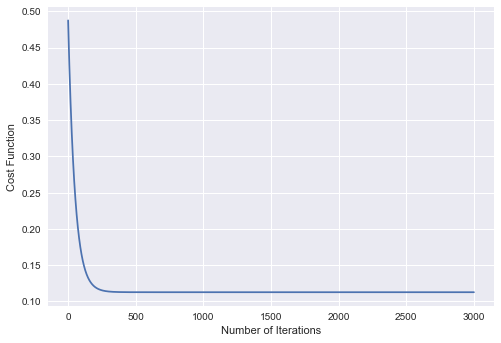

In [12]:
x = df1.ClearMax.values
yval = df1.absnum.values
dfsub = df1[['ClearMax', 'absnum']]
df1norm, df1mean, df1sd = normalizeData(dfsub)

x = df1norm.ClearMax.values
yval = df1norm.absnum.values

xmat = np.array([np.ones(x.shape), x]) ## This is a p x n matrix
xmat = xmat.T ## This turns this into a n x p matrix

m = len(yval)
nparam = xmat.shape[1]
coeff = np.zeros((nparam, 1))
yval.resize((m,1))

iterations = 3000
alpha = 0.01

coeff, J_history = gradientDescent(xmat, yval, coeff, alpha, iterations)
coeff = rescaledCoeff(coeff, df1mean, df1sd)

print 'The linear coefficient a is: ' + str(coeff[0][0])
print 'The intercept b is: ' + str(coeff[1][0])

plt.plot(J_history)
#pylab.ylim([3.3426e10,3.343e10])
plt.ylabel('Cost Function')
plt.xlabel('Number of Iterations')
#plt.show()

Indeed the coefficients agree with the package methods and the algebra methods. The cost function is monotonically decreasing with each iteration, so the final coefficient values should be reliable.

The strength of the gradient descent approach over the algebra approach is that it is much more scalable when the amount of data increases, since the inversion of a large matrix is computationally costly. However, you do need to make sure you choose appropriate learning parameters and number of iterations, or your results will not be accurate.